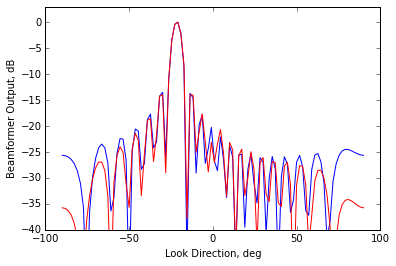

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import MultiTaskLasso, Ridge

# experiment specifications
numEl = 20
numLook = 1e2
arrayPosition = np.arange(numEl) * np.pi
thetaLook = np.r_[0 : np.pi : numLook * 1j] - (np.pi / 2)
thetaSource = -0.3758

# Make grid of look vectors
W = np.exp(1j * np.sin(thetaLook)[:,None] * arrayPosition)
data = np.exp(1j * np.sin(thetaSource) * arrayPosition).T

# Bartlet beamformer
bartlet = np.abs(np.dot(W.conj(), data))**2
B_bart = 10 * np.log10(np.abs(bartlet)); B_bart-=np.max(B_bart)

# Lasso setup
X = W.T
XSplit = np.vstack((np.hstack((X.real, X.imag)),\
                    np.hstack((-X.imag, X.real))))
YSplit = np.hstack((np.vstack((data.real, data.imag)),\
                    np.vstack((-data.imag, data.real)))).T
lasso_solver = Ridge(alpha=0.1)
lasso = lasso_solver.fit(XSplit, YSplit).coef_

# Manipulate result back into complex values
stack1 = np.squeeze(lasso[0,:])
stack1 = np.squeeze(stack1[:numLook] + 1j * stack1[numLook:])
B_lasso = 20 * np.log10(np.abs(stack1) + np.spacing(1)); B_lasso -= np.max(B_lasso)

# stack1 ?= stack2 (Should be exact)
stack2 = np.squeeze(lasso[1,:])
stack2 = np.squeeze(-1j * stack2[:numLook] + stack2[numLook:])
np.testing.assert_almost_equal(stack1, stack2, decimal=1)

# Plot both beamformer results
_ = plt.plot(np.rad2deg(thetaLook), B_bart)
_ = plt.plot(np.rad2deg(thetaLook), B_lasso, 'r')
_ = plt.ylim(-40,3); plt.ylabel('Beamformer Output, dB')
_ = plt.xlabel('Look Direction, deg')

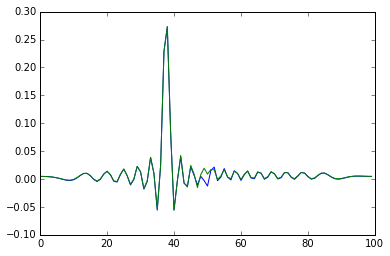

In [17]:
_ = plt.plot(np.real(stack1))
_ = plt.plot(np.real(stack2))